# Strategia di trading

In [2]:
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import math



titolo1 = "SWDA.MI" #Simbolo Etf MSCI World
titolo2 = "PHAU.MI" #Simbolo Etf su oro


msci = yf.download(titolo1, start='2010-01-01', end='2024-01-01')['Adj Close'].dropna().values
gold = yf.download(titolo2, start='2010-01-01', end='2024-01-01')['Adj Close'].dropna().values

print(len(msci),len(gold))






[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
3559 3559


In [3]:
def suddividi_in_sottovettori(vettore):
    risultato = []
    sottovettore = []

    for valore in vettore:
        if not sottovettore or valore == sottovettore[-1] + 1:
            sottovettore.append(valore)
        else:
            risultato.append(sottovettore)
            sottovettore = [valore]

    if sottovettore:
        risultato.append(sottovettore)

    return risultato

In [4]:
def trova_valore_piu_vicino(x, y):
    risultati = []

    for valore_x in x:
        valore_y_piu_vicino = min(filter(lambda v: v > valore_x, y), default=None)
        risultati.append([valore_x, valore_y_piu_vicino])

    return risultati

In [5]:
segnale = []
for i in range(1,len(msci)):
  if msci[i] < 0.9 * max(msci[max(i-365,0):i]):
    segnale.append(i)

x = []
for i in range(len(segnale)):
  if segnale[i] == segnale[i-1] + 1:
    x.append(segnale[i])

y = suddividi_in_sottovettori(x)

sell = []
for valore in y:
  sell.append(min(valore))




segnale1 = []
for i in range(1,len(msci)):
  if msci[i] >  1 * max(msci[max(i-365,0):i]):
    segnale1.append(i)

z = []
for i in range(len(segnale1)):
  if segnale1[i] == segnale1[i-1] + 1:
    z.append(segnale1[i])

w = suddividi_in_sottovettori(z)

buy = []
for valore in w:
  buy.append(max(valore))

sell_buy = trova_valore_piu_vicino(sell, buy)

print(sell_buy) #Necessario per completare il codice sottostante









[[127, 237], [411, 660], [1432, 1754], [1512, 1754], [1528, 1754], [1597, 1754], [1607, 1754], [1638, 1754], [1647, 1754], [2281, 2351], [2579, 2798], [2649, 2798], [2674, 2798], [2680, 2798], [2722, 2798], [2750, 2798], [3138, 3546], [3145, 3546], [3162, 3546], [3183, 3546], [3235, 3546], [3265, 3546], [3288, 3546], [3295, 3546], [3355, 3546]]


In [6]:
a = [gold[i] / gold[i-1] for i in range(127)] #gold
b = [msci[i] / msci[i-1] for i in range(127, 238)] #msci
c = [gold[i] / gold[i-1] for i in range(238, 411)] #gold
d = [msci[i] / msci[i-1] for i in range(411, 660)] #msci
e = [gold[i] / gold[i-1] for i in range(661, 1647)] #gold
f = [msci[i] / msci[i-1] for i in range(1647, 1755)] #msci
g = [gold[i] / gold[i-1] for i in range(1755, 2281)] #gold
h = [msci[i] / msci[i-1] for i in range(2281, 2352)] #msci
i = [gold[i] / gold[i-1] for i in range(2352, 2750)] #gold
j = [msci[i] / msci[i-1] for i in range(2750, 2799)] #msci
k = [gold[i] / gold[i-1] for i in range(2799, 3391)] #gold
l = [msci[i] / msci[i-1] for i in range(3391, 3547)] #msci
m = [gold[i] / gold[i-1] for i in range(3547, 3559)] #gold


In [9]:
p1 = a + b + c + d + e + f + g + h + i + j + k + l + m


In [13]:
print(len(p1))

3558


In [16]:
p2 = []
for i in range(1,len(msci)):
  p2.append(msci[i]/msci[i-1])

print(len(p2))

3558


In [18]:
valore_portafoglio1 = [10000*0.5]
for i in range(1,len(p1)):
  valore_portafoglio1.append(valore_portafoglio1[i-1]*p1[i])

valore_portafoglio2 = [10000*0.5]
for i in range(1,len(p2)):
  valore_portafoglio2.append(valore_portafoglio2[i-1]*p2[i])

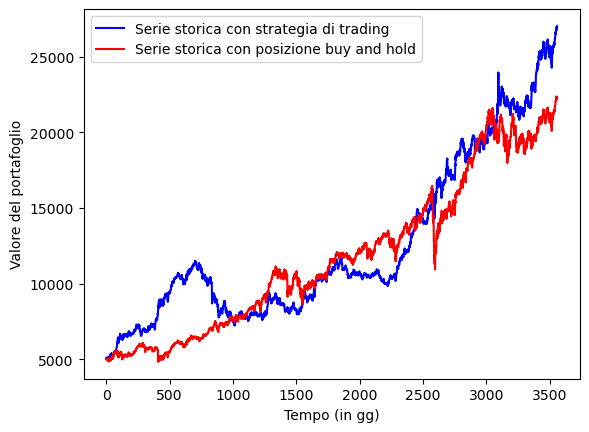

In [20]:
z = [i for i in range(3558)]
plt.plot(z,valore_portafoglio1,color='blue', label='Serie storica con strategia di trading')
plt.plot(z,valore_portafoglio2,color='red', label='Serie storica con posizione buy and hold')
plt.xlabel('Tempo (in gg)')
plt.ylabel('Valore del portafoglio')
plt.legend()